## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
url = '/Users/arpanganguli/Documents/Professional/Analysis/ISLR/Datasets/USArrests.csv'
USArrests = pd.read_csv(url, index_col='Unnamed: 0')
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


***

## 9.a. Using hierarchial clustering with complete linkage and Euclidean distance, with clustered states

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [8]:
hc_complete = linkage(y=USArrests, method='complete', metric='euclidean')

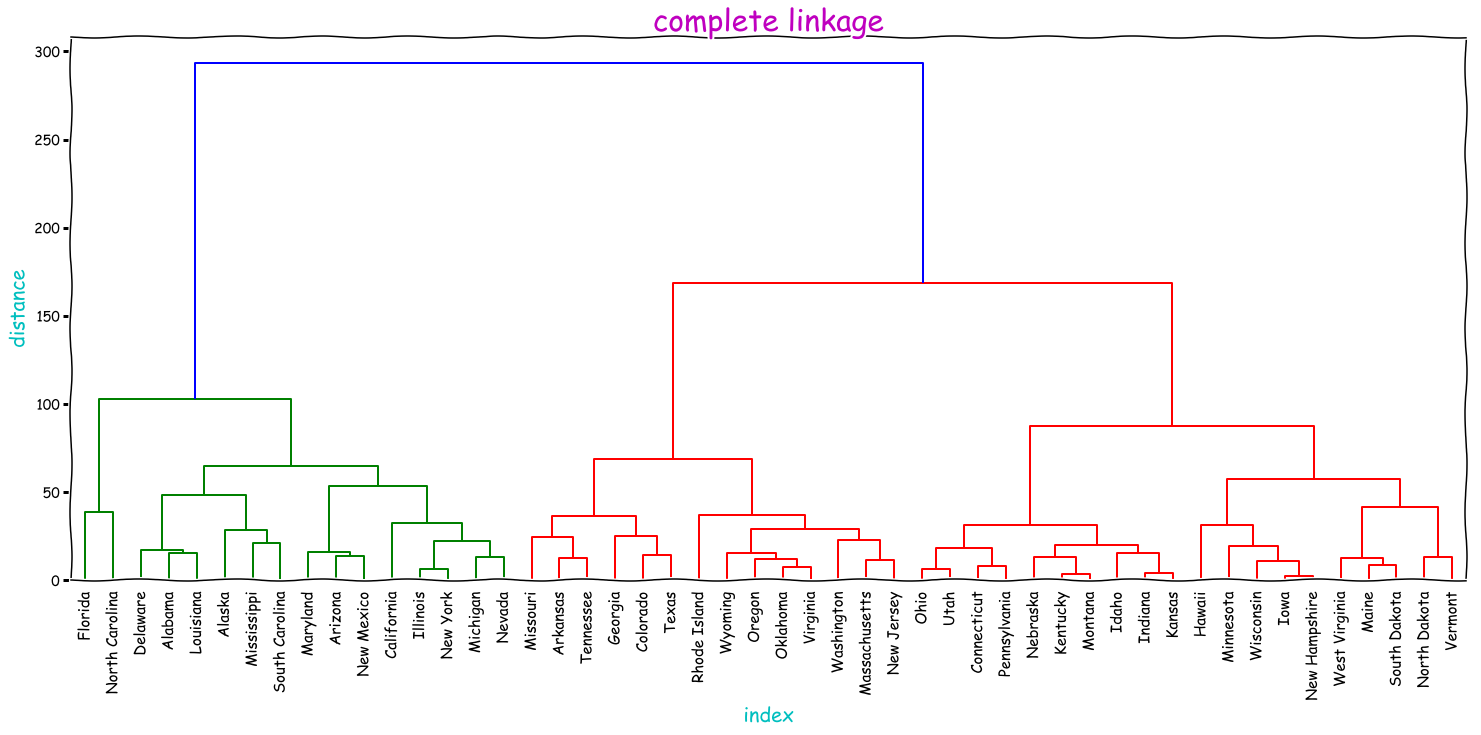

In [28]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
axes = USArrests.index.values
dendrogram(hc_complete, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=False, labels=axes)
plt.show()

***

## 8.b. Cutting the dendogram at a height that results in three distinct clusters

In [35]:
hc_cut3 = pd.DataFrame(cut_tree(hc_complete, n_clusters=3))
hc_cut3.columns = ['cluster']
hc_cut3.index = USArrests.index
hc_cut3

,cluster
Alabama,0
Alaska,0
Arizona,0
Arkansas,1
California,0
Colorado,1
Connecticut,2
Delaware,0
Florida,0
Georgia,1


In [37]:
hc_complete_3 = linkage(y=hc_cut3, method='complete', metric='euclidean')

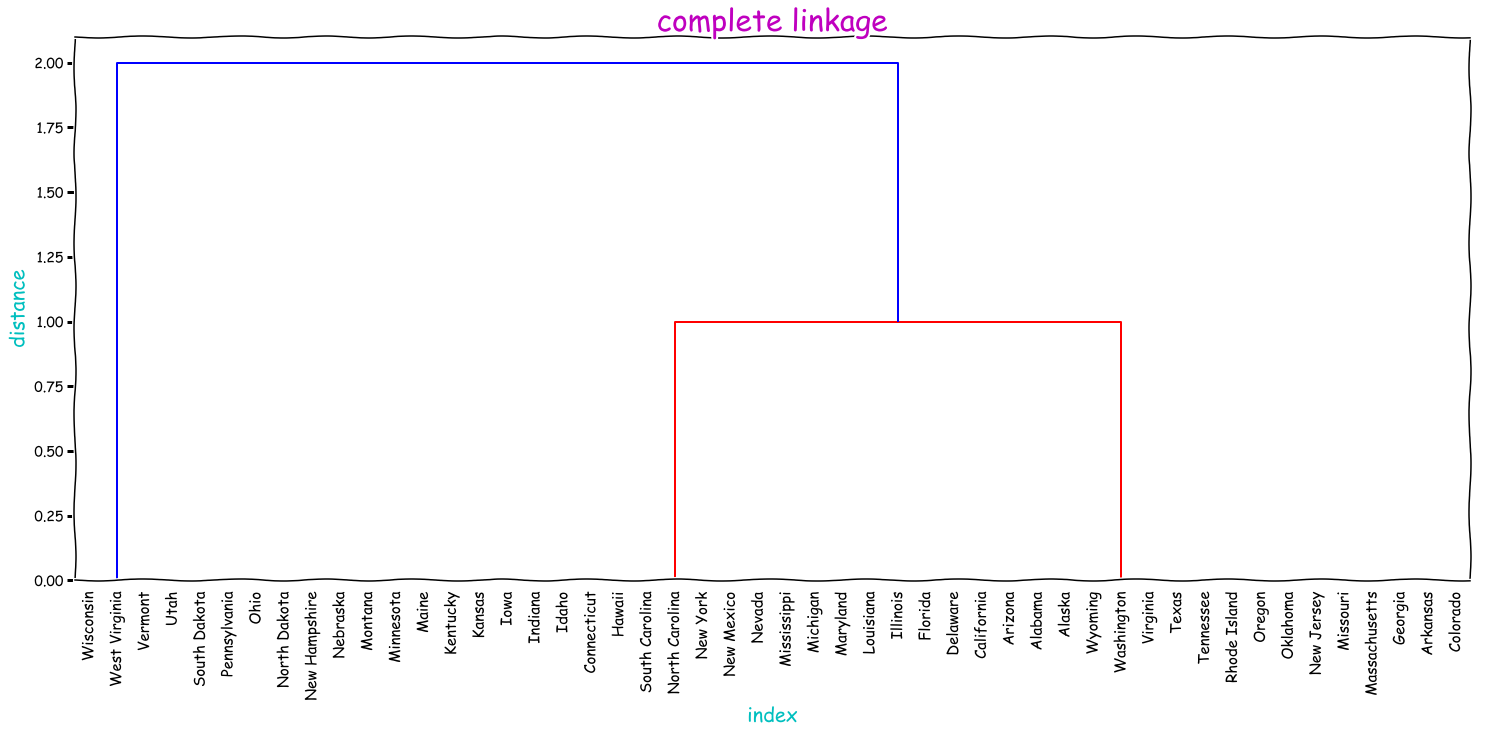

In [38]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
axes = USArrests.index.values
dendrogram(hc_complete_3, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=False, labels=axes)
plt.show()

***

## 8.c. Clustering states after scaling variables to have standard deviation = 1

In [41]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale

In [43]:
df = pd.DataFrame(scale(USArrests))
df.describe()

,0,1,2,3
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


In [44]:
hc_complete_scaled = linkage(y=df, method='complete', metric='euclidean')

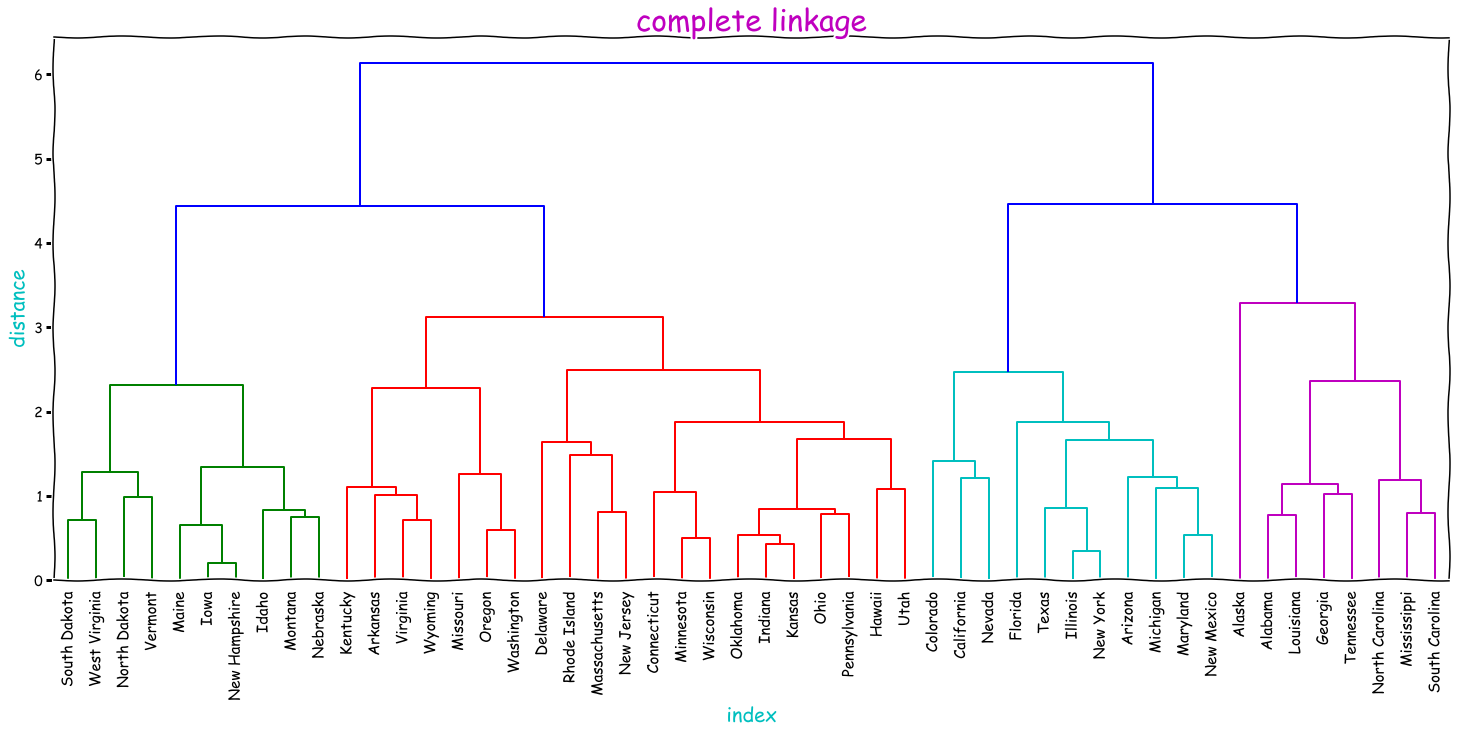

In [45]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
axes = USArrests.index.values
dendrogram(hc_complete_scaled, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=False, labels=axes)
plt.show()

In [46]:
hc_cut3_scaled = pd.DataFrame(cut_tree(hc_complete_scaled, n_clusters=3))
hc_cut3_scaled.columns = ['cluster']
hc_cut3_scaled.index = USArrests.index
hc_cut3_scaled

,cluster
Alabama,0
Alaska,0
Arizona,1
Arkansas,2
California,1
Colorado,1
Connecticut,2
Delaware,2
Florida,1
Georgia,0


In [47]:
hc_complete_3_scaled = linkage(y=hc_cut3_scaled, method='complete', metric='euclidean')

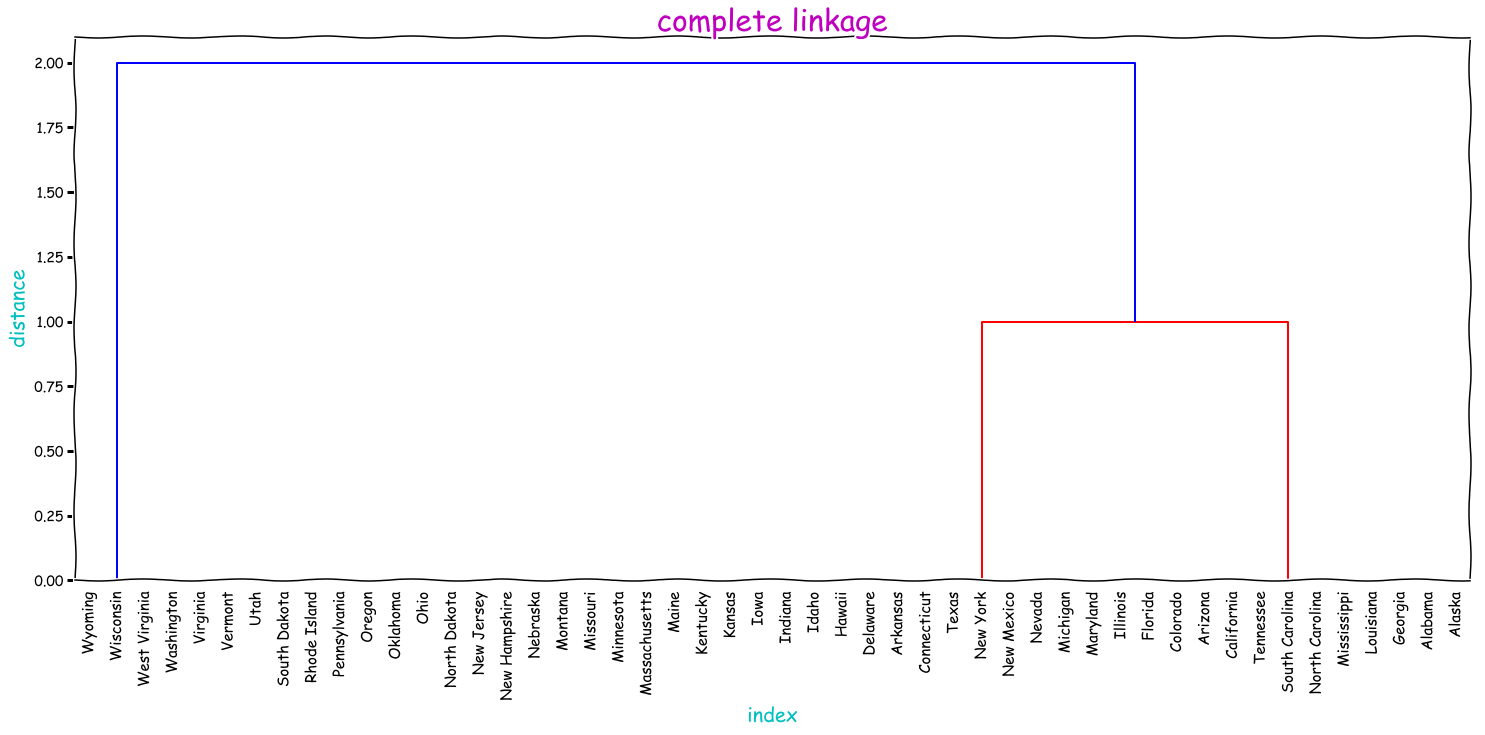

In [48]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.title('complete linkage', fontsize=30, color='m')
plt.xlabel('index', fontsize=20, color='c')
plt.ylabel('distance', fontsize=20, color='c')
axes = USArrests.index.values
dendrogram(hc_complete_3_scaled, leaf_rotation=90., leaf_font_size=15., show_leaf_counts=False, labels=axes)
plt.show()

***

## 9.d. Effect of scaling the variables

*Scaling variables increases the number of clusters and when introducing cuts of 3 clusters, it changes the composition of clusters.<br>Scaling of variables before computing inter-observation dissimilarities are computed is desirable because the metric used to count different features in a data set. E.g. In the `USArrests` data set, `UrbanPop` data is likely to be measured in a different way to `Assault`. So, scaling ensures like data are being compared.*